In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import os
import datetime

import matplotlib.pyplot as plt
from skimage import color, exposure

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/dw_mtx/'

/content/drive/My Drive/Colab Notebooks/dw_mtx


In [0]:
ls './data'

car.h5  men_shoes.csv  signnames.csv  test.p  train.p


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =64, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     Flatten(),
     Dense(num_classes, activation='softmax')
    ]
)
  
def train_model(model, X_train, y_train, params_fit = {}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_test, y_test)),
      callbacks=[tensorboard_callback]
      )
  return model

In [0]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 36.7207 - accuracy: 0.7420 - val_loss: 1.8200 - val_accuracy: 0.7771
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2080 - accuracy: 0.9541 - val_loss: 1.6618 - val_accuracy: 0.8129
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1130 - accuracy: 0.9738 - val_loss: 1.7450 - val_accuracy: 0.8084
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.0985 - accuracy: 0.9774 - val_loss: 2.1602 - val_accuracy: 0.8333
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.0833 - accuracy: 0.9816 - val_loss: 2.4859 - val_accuracy: 0.8236


In [0]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[1.9955040e-08, 3.5275605e-02, 8.9399815e-02, ..., 8.2634127e-05,
        2.8718919e-03, 1.2590632e-05],
       [9.1537922e-10, 6.0043618e-04, 6.0694148e-03, ..., 2.7228622e-05,
        2.6563384e-06, 2.5309794e-07],
       [4.1676330e-08, 1.7180640e-02, 1.3387781e-01, ..., 9.2635275e-04,
        1.7709798e-01, 2.1622551e-04],
       ...,
       [2.1153193e-03, 1.2151405e-02, 2.0882173e-02, ..., 4.7783405e-03,
        1.4648155e-03, 1.7651035e-05],
       [7.0881182e-03, 3.5443716e-02, 7.9196826e-02, ..., 2.4355628e-02,
        6.0161352e-03, 2.6775594e-04],
       [4.2756554e-04, 2.6963612e-03, 3.8360064e-03, ..., 4.7233724e-04,
        1.7034491e-04, 2.1023557e-06]], dtype=float32)

In [0]:
y_pred_prob[400]

array([8.42360721e-04, 9.97235954e-01, 1.89306447e-03, 8.80861627e-13,
       2.86467530e-05, 1.27748097e-22, 9.71216506e-35, 4.29471843e-18,
       2.88340963e-29, 1.52893902e-14, 5.28147120e-31, 7.05422210e-15,
       4.38551538e-23, 4.93433882e-17, 0.00000000e+00, 1.30087934e-22,
       8.89062285e-34, 0.00000000e+00, 4.01617215e-22, 0.00000000e+00,
       7.56398267e-21, 2.53265628e-24, 1.97594234e-26, 8.91410458e-38,
       1.68839101e-35, 9.12336127e-18, 4.12381352e-26, 0.00000000e+00,
       1.83694091e-24, 8.27190642e-19, 3.82746627e-37, 9.41034023e-27,
       1.28825034e-17, 0.00000000e+00, 0.00000000e+00, 1.69176585e-24,
       0.00000000e+00, 0.00000000e+00, 2.81011255e-36, 0.00000000e+00,
       8.95104187e-23, 1.70132718e-36, 5.79440867e-25], dtype=float32)

In [0]:
np.argmax(y_pred_prob[400])

1

In [0]:
np.sum(y_pred_prob[400])

1.0

<BarContainer object of 43 artists>

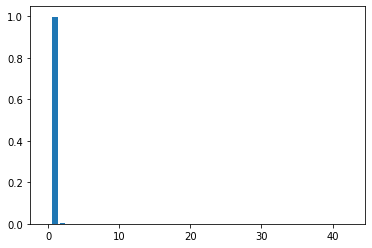

In [0]:
plt.bar(range(43), y_pred_prob[400])

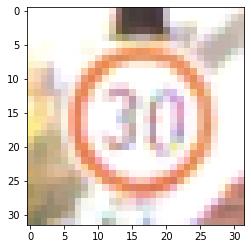

In [0]:
plt.imshow(X_test[400]);

In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):
  y_test_norm =  np.argmax(y_test, axis = 1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis =1)

  return scoring(y_test_norm, y_pred)

In [0]:
predict(model_trained, X_test, y_test )

0.8235827664399092

In [0]:


def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)



In [0]:


def get_cnn_v2(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =32, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),
     
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(num_classes, activation='softmax')
    ]

)

train_and_predict(get_cnn_v2(input_shape, num_classes))



Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 3.8683 - accuracy: 0.5009 - val_loss: 0.7504 - val_accuracy: 0.8154
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.5722 - accuracy: 0.8316 - val_loss: 0.5793 - val_accuracy: 0.8560
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3605 - accuracy: 0.8931 - val_loss: 0.4403 - val_accuracy: 0.9027
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2693 - accuracy: 0.9201 - val_loss: 0.3911 - val_accuracy: 0.9177
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2145 - accuracy: 0.9363 - val_loss: 0.3039 - val_accuracy: 0.9313


0.9312925170068027

In [0]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =32, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     Conv2D(filters =32, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),
     
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(num_classes, activation='softmax')
    ]

)

train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 1.8591 - accuracy: 0.5801 - val_loss: 0.4355 - val_accuracy: 0.8735
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4245 - accuracy: 0.8726 - val_loss: 0.2222 - val_accuracy: 0.9395
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2498 - accuracy: 0.9262 - val_loss: 0.1562 - val_accuracy: 0.9580
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1640 - accuracy: 0.9499 - val_loss: 0.1560 - val_accuracy: 0.9621
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1283 - accuracy: 0.9613 - val_loss: 0.2065 - val_accuracy: 0.9535


0.953514739229025

In [0]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =32, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     Conv2D(filters =32, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu', padding='same'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu', padding='same'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),
     
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(num_classes, activation='softmax')
    ]

)

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.6572 - accuracy: 0.2861 - val_loss: 1.3272 - val_accuracy: 0.5921
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.9301 - accuracy: 0.7057 - val_loss: 0.3535 - val_accuracy: 0.8828
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4015 - accuracy: 0.8754 - val_loss: 0.2048 - val_accuracy: 0.9404
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2499 - accuracy: 0.9225 - val_loss: 0.1648 - val_accuracy: 0.9494
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1854 - accuracy: 0.9436 - val_loss: 0.1090 - val_accuracy: 0.9719


0.9718820861678005

In [0]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =32, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     Conv2D(filters =32, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu', padding='same'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu', padding='same'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),
     
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(num_classes, activation='softmax')
    ]

)

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.6642 - accuracy: 0.2702 - val_loss: 1.5700 - val_accuracy: 0.5057
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 1.1402 - accuracy: 0.6280 - val_loss: 0.5697 - val_accuracy: 0.8483
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.5453 - accuracy: 0.8246 - val_loss: 0.4020 - val_accuracy: 0.8810
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.3705 - accuracy: 0.8827 - val_loss: 0.2586 - val_accuracy: 0.9213
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2851 - accuracy: 0.9115 - val_loss: 0.2234 - val_accuracy: 0.9413


0.9412698412698413

In [0]:
train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 1.8163 - accuracy: 0.6165 - val_loss: 0.3672 - val_accuracy: 0.9034
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3830 - accuracy: 0.8890 - val_loss: 0.2201 - val_accuracy: 0.9535
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2325 - accuracy: 0.9328 - val_loss: 0.2614 - val_accuracy: 0.9483
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1617 - accuracy: 0.9517 - val_loss: 0.1283 - val_accuracy: 0.9746
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1277 - accuracy: 0.9632 - val_loss: 0.1711 - val_accuracy: 0.9630


0.9630385487528345

In [0]:
color.rgb2gray(X_train[0]).shape

(32, 32)

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [0]:
model=get_cnn_v5((32,32,1), num_classes)
model_trained= train_model(model,X_train_gray,y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.3457 - accuracy: 0.3408 - val_loss: 0.9865 - val_accuracy: 0.7122
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.7385 - accuracy: 0.7669 - val_loss: 0.3270 - val_accuracy: 0.8984
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3939 - accuracy: 0.8797 - val_loss: 0.2778 - val_accuracy: 0.9431
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2623 - accuracy: 0.9185 - val_loss: 0.1953 - val_accuracy: 0.9526
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2012 - accuracy: 0.9394 - val_loss: 0.2272 - val_accuracy: 0.9655


0.9655328798185941

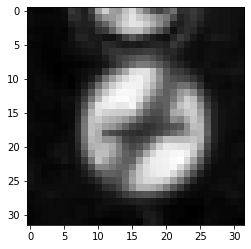

In [0]:

plt.imshow(color.rgb2gray(X_train[0]),cmap=plt.get_cmap("gray"));



fatal: not a git repository (or any of the parent directories): .git
